<a href="https://colab.research.google.com/github/Alvinlaw0316/UCCC2513-MINI-PROJECT/blob/main/Mini_Project%20traffic%20sign%20classification%20AlexNet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alvinlaw316","key":"d873bed608707a557ac9ad56bef960fa"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
stefanydeoliveira/summer-olympics-medals-1896-2024                   Summer Olympics Medals (1896-2024)               4MB  2024-08-29 23:52:10           1078         25  1.0              
haseebindata/student-performance-predictions                         Student Performance Predictions                  9KB  2024-08-17 06:57:57           6677        142  0.9411765        
berkayalan/paris-2024-olympics-medals                                Paris 2024 Olympics Medals                       1KB  2024-08-14 11:02:45           5680        102  1.0              
uom190346a/ai-powered-job-market-insights                   

In [6]:
!kaggle datasets download -d dmitryyemelyanov/chinese-traffic-signs

Dataset URL: https://www.kaggle.com/datasets/dmitryyemelyanov/chinese-traffic-signs
License(s): CC0-1.0
 99% 182M/185M [00:01<00:00, 117MB/s]
100% 185M/185M [00:01<00:00, 97.2MB/s]


In [7]:
!unzip -q chinese-traffic-signs.zip

In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [9]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/annotations.csv")
df.head()

file_name  width  height  x1  y1   x2   y2  category
0  000_0001.png    134     128  19   7  120  117         0
1  000_0002.png    165     151  23  12  149  138         0
2  000_0003.png    128     122  22  14  116  105         0
3  000_0010.png     80      73  14   8   67   63         0
4  000_0011.png    186     174  36  15  155  157         0

In [10]:
data_dir = '/content/images/'

In [11]:
print(df.columns)

Index(['file_name', 'width', 'height', 'x1', 'y1', 'x2', 'y2', 'category'], dtype='object')


In [12]:
print(df.dtypes)

file_name    object
width         int64
height        int64
x1            int64
y1            int64
x2            int64
y2            int64
category      int64
dtype: object


In [13]:
df.isnull().sum()

file_name    0
width        0
height       0
x1           0
y1           0
x2           0
y2           0
category     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  6164 non-null   object
 1   width      6164 non-null   int64 
 2   height     6164 non-null   int64 
 3   x1         6164 non-null   int64 
 4   y1         6164 non-null   int64 
 5   x2         6164 non-null   int64 
 6   y2         6164 non-null   int64 
 7   category   6164 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 385.4+ KB


<ipython-input-16-867e819120cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='flare', order=df['category'].value_counts().index)


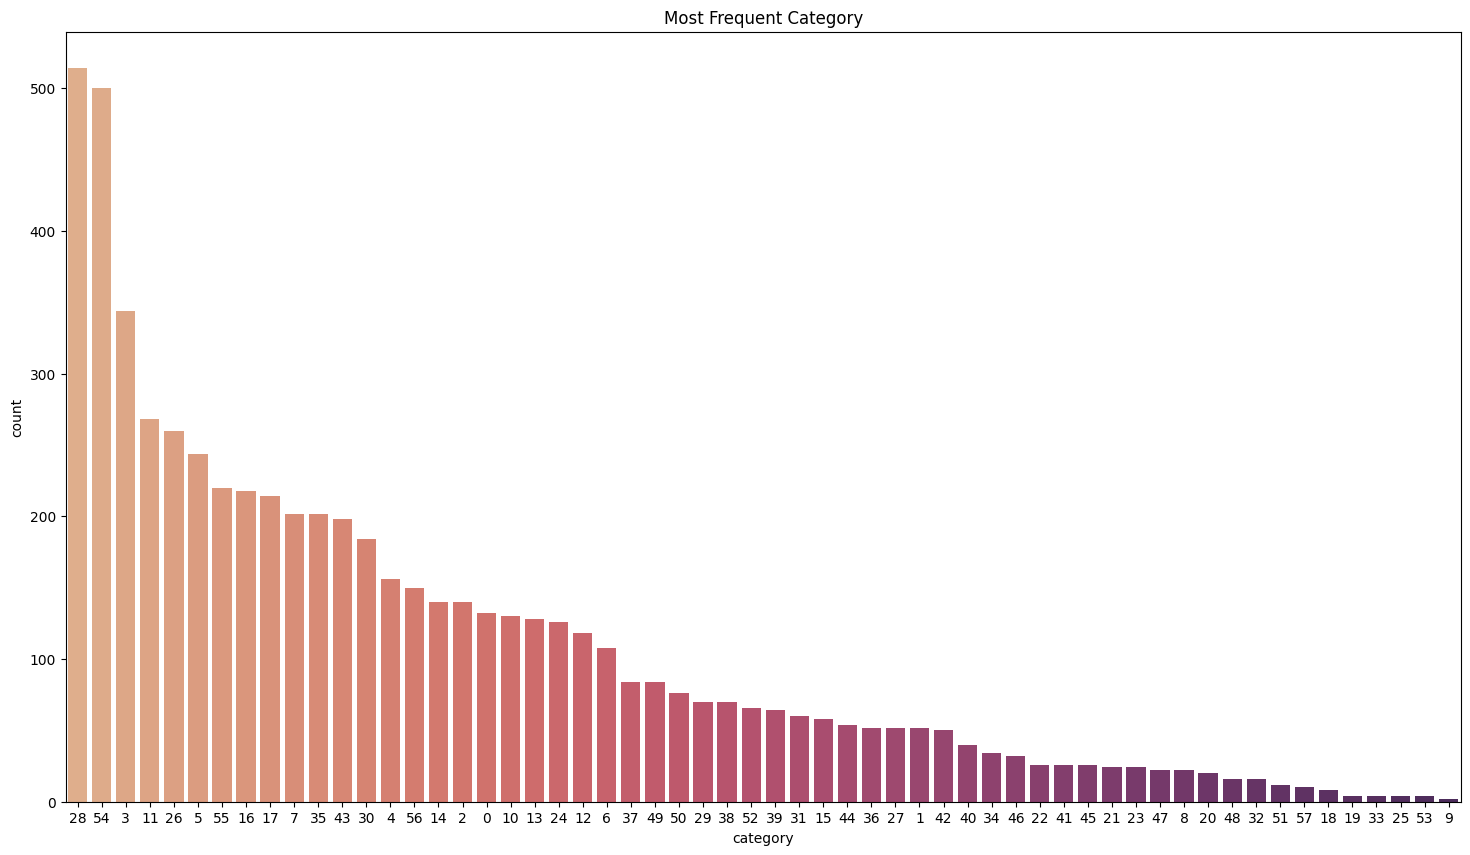

In [16]:
plt.figure(figsize=(18, 10))
sns.countplot(x='category', data=df, palette='flare', order=df['category'].value_counts().index)
plt.title('Most Frequent Category')
plt.show()

In [17]:
# Extract the file paths and labels from the DataFrame
file_paths = df['file_name'].values
labels = df['category'].values

In [18]:
images = []

In [19]:
# Loop over the file paths
for file_path in file_paths:
    # Define the path to the image file
    image_path = os.path.join(data_dir, file_path)
    # Load the image and resize it to a fixed size
    image = Image.open(image_path).resize((224, 224))
    # Append the image to the list
    images.append(np.array(image))

In [20]:
# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [21]:
labels

array([ 0,  0,  0, ..., 56, 57, 57])

array([[[131, 114,  98],
        [131, 114,  98],
        [132, 115,  98],
        ...,
        [103,  88,  77],
        [103,  88,  76],
        [103,  88,  76]],

       [[131, 114,  98],
        [131, 114,  98],
        [132, 115,  98],
        ...,
        [103,  88,  77],
        [103,  89,  76],
        [103,  89,  76]],

       [[132, 114,  99],
        [132, 114,  99],
        [131, 115,  98],
        ...,
        [102,  89,  76],
        [102,  90,  76],
        [102,  90,  76]],

       ...,

       [[154,  26,  67],
        [155,  25,  64],
        [158,  24,  60],
        ...,
        [ 91,  82,  74],
        [ 91,  83,  73],
        [ 91,  83,  73]],

       [[155,  24,  56],
        [156,  24,  57],
        [159,  25,  58],
        ...,
        [ 91,  83,  73],
        [ 92,  84,  72],
        [ 92,  84,  72]],

       [[155,  24,  51],
        [157,  24,  53],
        [160,  25,  57],
        ...,
        [ 91,  83,  73],
        [ 92,  84,  72],
        [ 92,  84,  72]]], dtype=uint8)
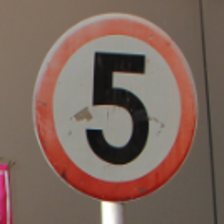

In [22]:
images[0]

In [23]:
# Split the data into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

array([[[116,  37,  39],
        [122,  38,  40],
        [131,  42,  44],
        ...,
        [ 72,  73,  57],
        [ 67,  68,  51],
        [ 91,  92,  73]],

       [[115,  35,  37],
        [122,  37,  40],
        [131,  42,  44],
        ...,
        [110, 112,  95],
        [108, 110,  92],
        [128, 129, 110]],

       [[113,  31,  32],
        [121,  36,  38],
        [132,  41,  44],
        ...,
        [186, 188, 170],
        [188, 191, 172],
        [200, 203, 183]],

       ...,

       [[131,  54,  61],
        [131,  54,  61],
        [131,  54,  60],
        ...,
        [ 22,  32,  19],
        [ 24,  30,  18],
        [ 25,  28,  18]],

       [[133,  56,  63],
        [133,  56,  63],
        [133,  56,  62],
        ...,
        [ 24,  33,  11],
        [ 31,  34,  15],
        [ 36,  36,  19]],

       [[133,  56,  63],
        [133,  56,  63],
        [133,  56,  62],
        ...,
        [ 25,  33,   8],
        [ 34,  37,  14],
        [ 42,  40,  20]]], dtype=uint8)
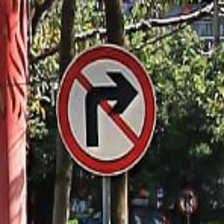

In [24]:
X_train[0]

In [25]:
y_train[0]

13

In [26]:
# Preprocess the data by scaling the pixel values to [0, 1] and converting the labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [28]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3944, 224, 224, 3) (3944, 58)
Validation set shape: (987, 224, 224, 3) (987, 58)
Test set shape: (1233, 224, 224, 3) (1233, 58)


In [61]:
import cv2
import numpy as np

# Define a function to resize images
def preprocess_images(images, target_size=(128, 128)):
    processed_images = []
    for img in images:
        # Resize image using OpenCV
        resized_img = cv2.resize(img, target_size)

        # Convert to grayscale
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

        # Normalize pixel values to [0, 1]
        normalized_img = gray_img / 255.0

        processed_images.append(normalized_img)
    return np.array(processed_images)

# Example usage:
# Assuming X_train, X_val, X_test are your original datasets
X_train_resized = resize_images(X_train, target_size=(128, 128))
X_val_resized = resize_images(X_val, target_size=(128, 128))
X_test_resized = resize_images(X_test, target_size=(128, 128))

print("Training set shape after resizing:", X_train_resized.shape)
print("Validation set shape after resizing:", X_val_resized.shape)
print("Test set shape after resizing:", X_test_resized.shape)


Training set shape after resizing: (3944, 128, 128, 3)
Validation set shape after resizing: (987, 128, 128, 3)
Test set shape after resizing: (1233, 128, 128, 3)


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#Ensure you are using tensorflow.keras.preprocessing.image for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a Sequential model
AlexNet = Sequential()

# 1st Convolutional Layer (Reduced Filters)
AlexNet.add(Conv2D(filters=48, input_shape=(128, 128, 3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer (Reduced Filters)
AlexNet.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer (Reduced Filters)
AlexNet.add(Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 4th Convolutional Layer (Reduced Filters)
AlexNet.add(Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 5th Convolutional Layer (Reduced Filters)
AlexNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# 1st Fully Connected Layer (Reduced Units)
AlexNet.add(Dense(2048))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# 2nd Fully Connected Layer (Reduced Units)
AlexNet.add(Dense(2048))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Output Layer
AlexNet.add(Dense(58))  # 58 classes
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()

# Compile the model
AlexNet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, rotation_range=10, width_shift_range=0.1,
    height_shift_range=0.1, horizontal_flip=True, vertical_flip=False)

datagen.fit(X_train_resized)

# Train the model with a reduced batch size
history = AlexNet.fit(
    datagen.flow(X_train_resized, y_train, batch_size=16),  # Use resized images
    steps_per_epoch=len(X_train_resized) // 16,
    validation_data=(X_val_resized, y_val),  # Use resized validation images
    epochs=50,
    verbose=1
)

# Evaluate the model on the resized test data
score = AlexNet.evaluate(X_test_resized, y_test, verbose=0)  # Use resized test images
print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 48)          │          17,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 32, 32, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 32, 32, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 128)         │         153,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 192)           │         221,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 8, 8, 192)           │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 8, 8, 192)           │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 128)           │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │              

 Total params: 9,476,770 (36.15 MB)

 Trainable params: 9,467,086 (36.11 MB)

 Non-trainable params: 9,684 (37.83 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


246/246 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - accuracy: 0.1519 - loss: 3.5537 - val_accuracy: 0.2786 - val_loss: 2.7868
Epoch 2/50
  1/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5000 - loss: 2.1957

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 2.1957 - val_accuracy: 0.2695 - val_loss: 2.7798
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.3911 - loss: 2.4370 - val_accuracy: 0.4053 - val_loss: 2.3031
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 1.7633 - val_accuracy: 0.4488 - val_loss: 2.0777
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.5299 - loss: 1.9160 - val_accuracy: 0.5633 - val_loss: 1.4776
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 1.4811 - val_accuracy: 0.5917 - val_loss: 1.4275
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.6086 - loss: 1.6216 - val_accuracy: 0.7589 - val_loss: 0.8814
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5625 - loss: 1.4998 - val_accuracy: 0.7599 - val_loss: 0.8414
Epoch 9/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.6669 - loss: 1.3979 - val_accuracy: 0.7

In [63]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

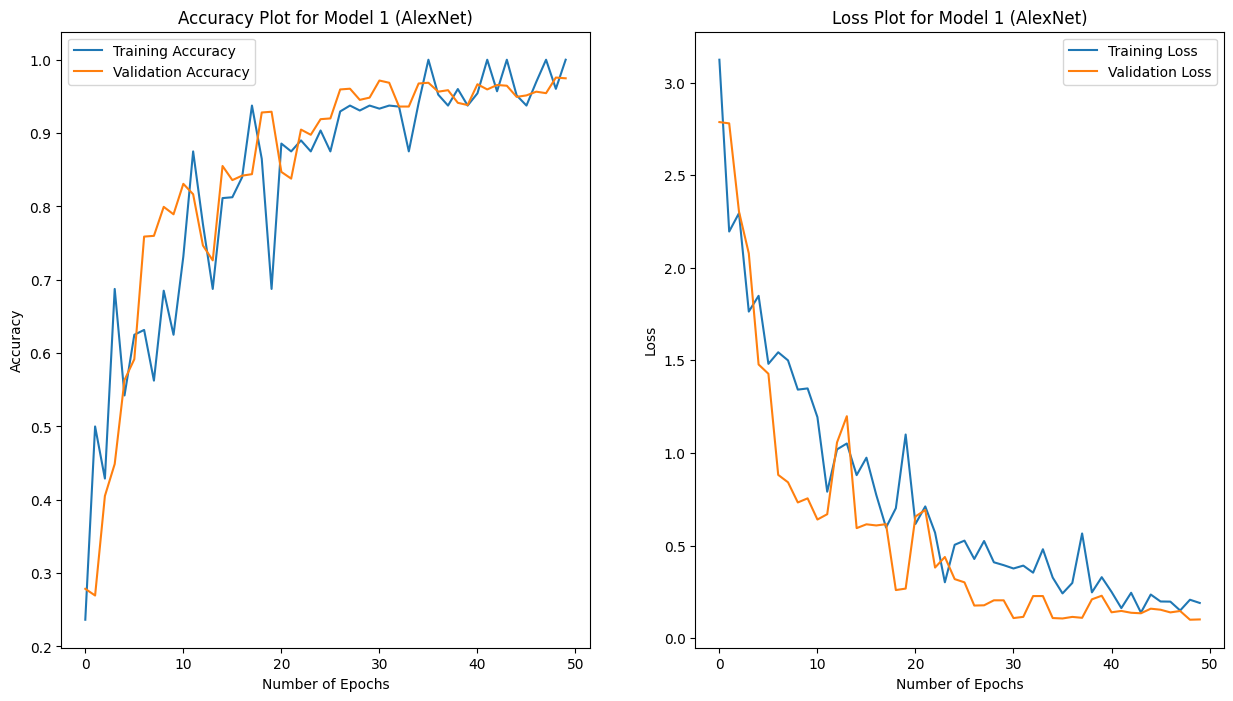

In [64]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 1 (AlexNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 1 (AlexNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()

In [65]:
# Evaluate the model with renamed variables
score = New_model1.evaluate(X_test_resized, y_test)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9744 - loss: 0.0926


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        31
           5       1.00      0.97      0.98        58
           6       1.00      1.00      1.00        27
           7       0.94      0.97      0.95        32
           8       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        63
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


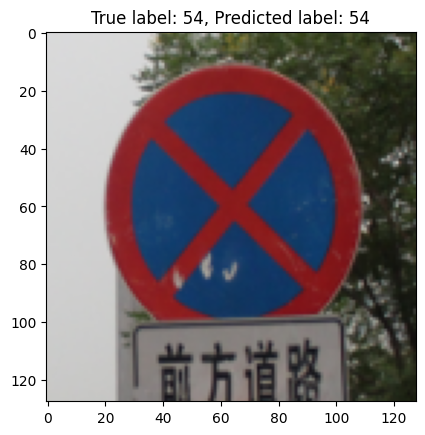

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


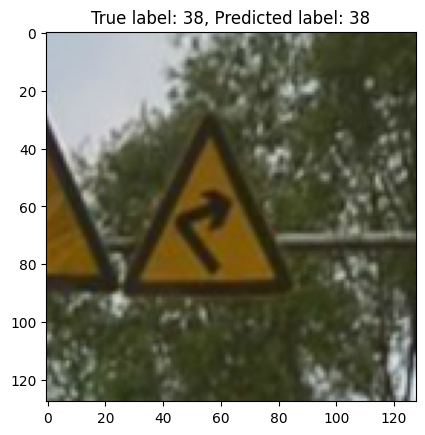

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


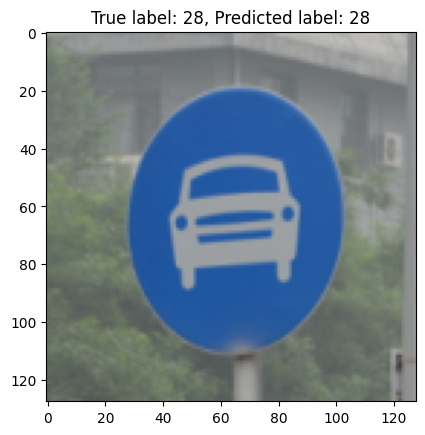

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


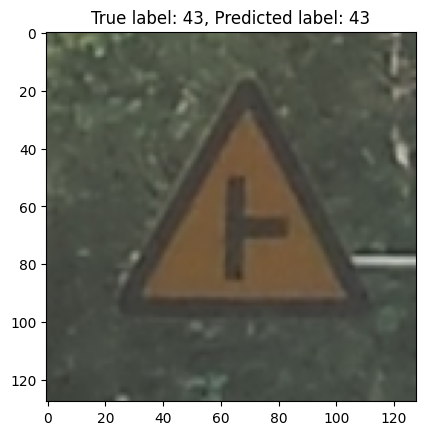

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


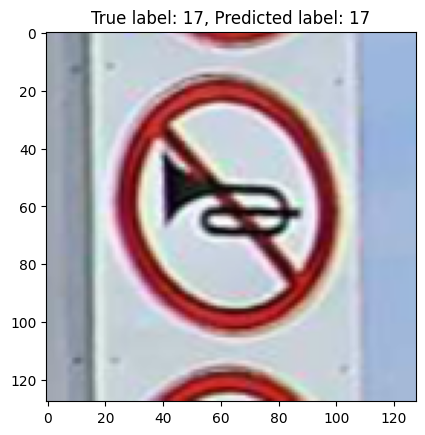

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


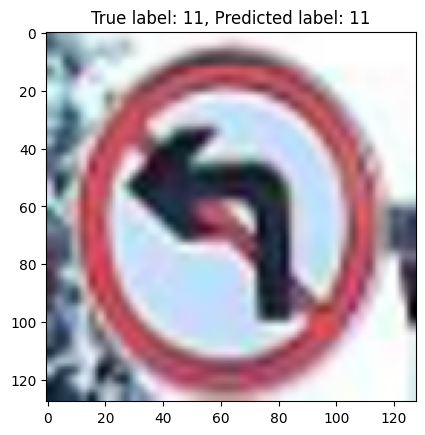

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


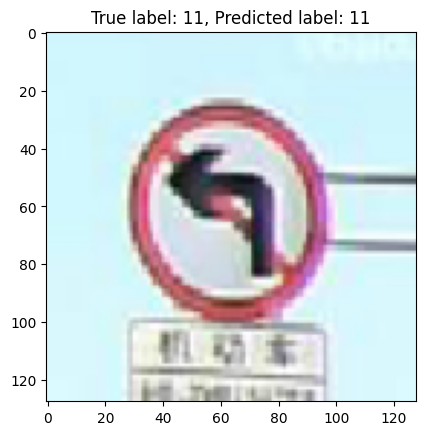

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


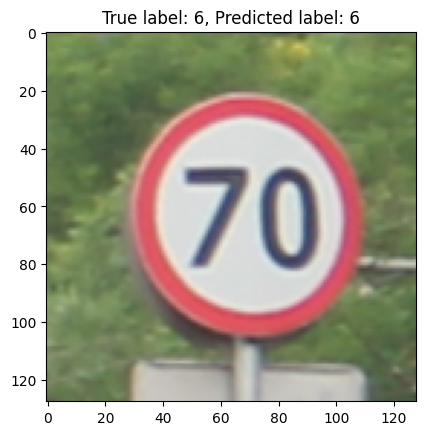

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


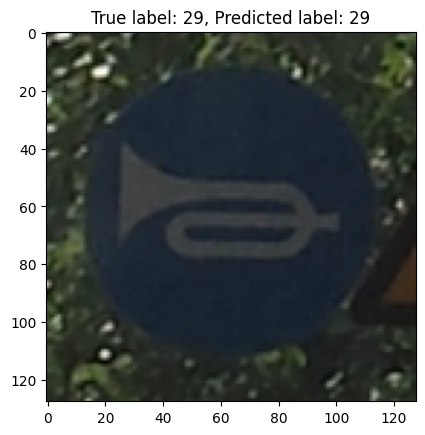

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


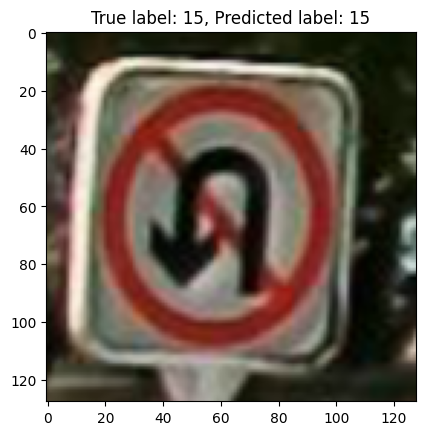

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


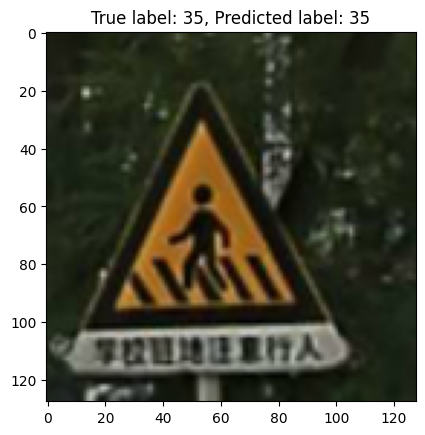

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


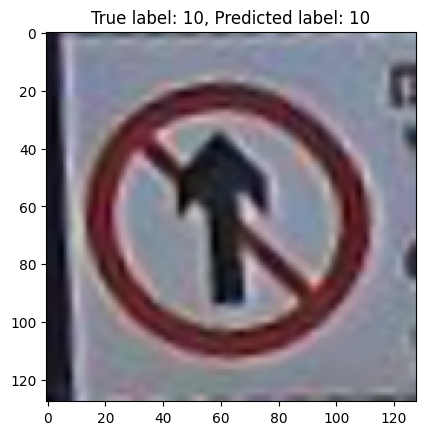

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


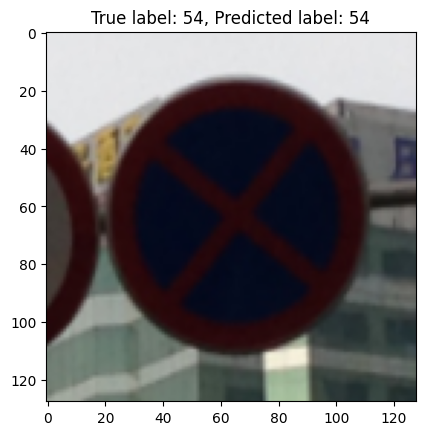

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


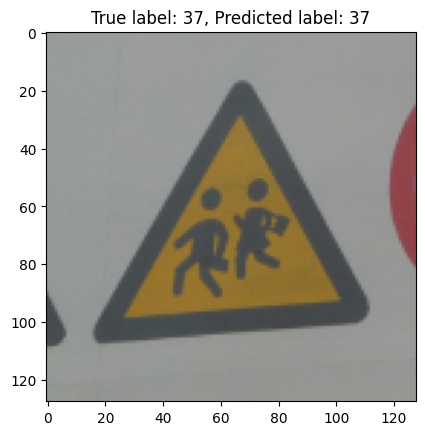

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


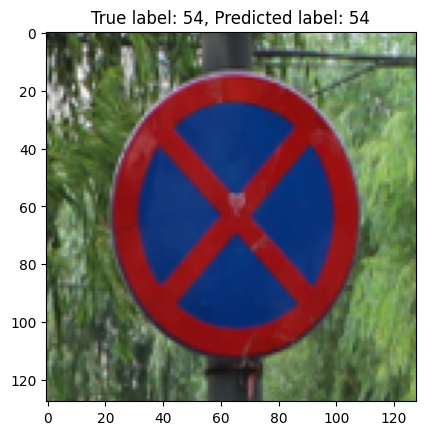

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


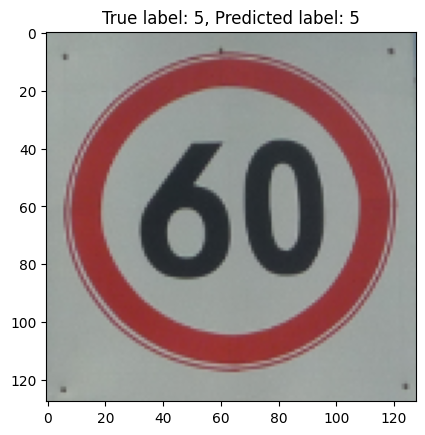

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


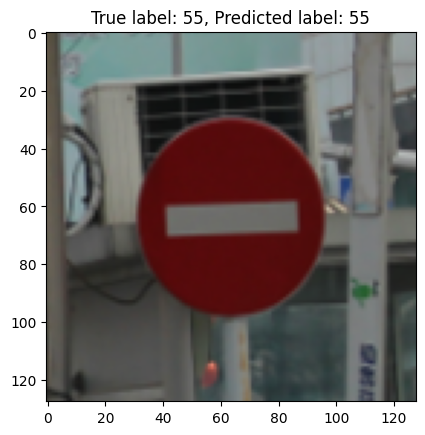

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


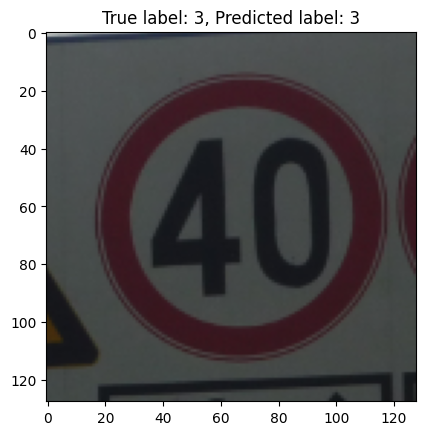

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


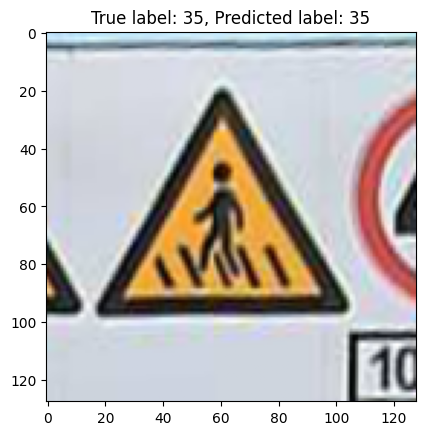

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


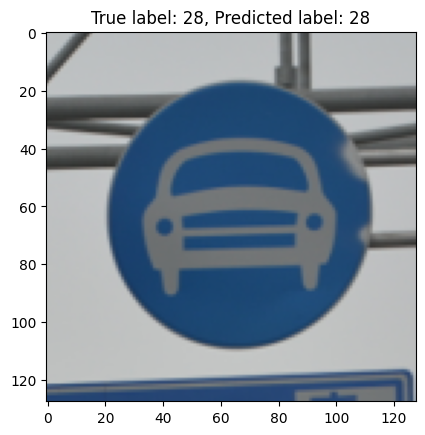

In [87]:
# Run the prediction 10 times
for i in range(20):
  # Choose a random test image
  index = np.random.randint(len(X_test_resized))
  test_image = X_test_resized[index]

  # Get the true label and predicted label for the test image
  true_label = np.argmax(y_test,axis=1)[index]
  predicted_label = New_model1.predict(np.expand_dims(test_image, axis=0))
  predicted_label = np.argmax(predicted_label, axis=1)[0]

  # Display the image with true and predicted labels
  plt.figure()
  plt.imshow(test_image)
  plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


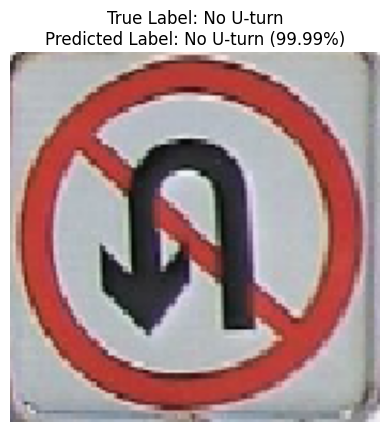

In [106]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array  # Import load_img and img_to_array
import os  # For checking file existence

# Define the directory where the images are stored
data_dir = '/content/images/'

# Updated class labels mapping index to traffic sign description
class_labels = {
    0: "5 km/h speed limit",
    1: "15 km/h speed limit",
    2: "30 km/h speed limit",
    3: "40 km/h speed limit",
    4: "50 km/h speed limit",
    5: "60 km/h speed limit",
    6: "70 km/h speed limit",
    7: "80 km/h speed limit",
    8: "No straight or turn left",
    9: "No straight or turn right",
    10: "No straight",
    11: "No left turn",
    12: "No left or right turn",
    13: "No right turn",
    14: "No overtaking",
    15: "No U-turn",
    16: "No car allowed",
    17: "No horn",
    18: "End of 40 km/h speed limit",
    19: "End of 50 km/h speed limit",
    20: "Go straight or turn right",
    21: "Go straight",
    22: "Turn left",
    23: "Turn left or right",
    24: "Turn right",
    25: "Keep left",
    26: "Keep right",
    27: "Roundabout",
    28: "Vehicles path",
    29: "Sound horn",
    30: "Bike path"
}

# Choose a random test image from the DataFrame
index = np.random.randint(len(df))
row = df.iloc[index]
image_path = f"{data_dir}{row['file_name']}"

# Check if the image file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

# Load the image
test_image = load_img(image_path, target_size=(128, 128))  # Adjust target_size as necessary
test_image_array = img_to_array(test_image) / 255.0  # Normalize to [0,1]

# Get the true label from the DataFrame
true_label = row['category']
true_label_text = class_labels.get(true_label, "Unknown Sign")

# Predict the label using the model
predicted_label_probs = New_model1.predict(np.expand_dims(test_image_array, axis=0))
predicted_label = np.argmax(predicted_label_probs, axis=1)[0]
predicted_label_text = class_labels.get(predicted_label, "Unknown Sign")
predicted_prob = np.max(predicted_label_probs) * 100  # Probability of the predicted label

# Display the test image and its classification result
plt.imshow(test_image)
plt.title(f"True Label: {true_label_text}\nPredicted Label: {predicted_label_text} ({predicted_prob:.2f}%)")
plt.axis('off')
plt.show()
